In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Some comments on the data collected on 2024/08/27:

Somehow, I don't think we completely understood how to save the data to csv. For some reason, the only data saved to csv were the last 3 runs of the non-AR sample but all 5 runs of the AR sample. We're missing the 1160 nm - 1260 nm scan and the 1000 nm - 1200 nm scan for the non-AR sample. This may still be somewhere in the BSW file, which I cannot open unless on the MRSEC computer connected to the Cary 5000.

For now, I will analyze the complete set of data for the AR-coated sample below.


In [2]:
data_names=['non-AR-1700-1550-Wavelengths', 'non-AR-1700-1550-Absorption', 'non-AR-1950-1800-Wavelengths', 'non-AR-1950-1800-Absorption', 
            'AR-2000-1000-Wavelengths', 'AR-2000-1000-Absorption', 'AR-1260-1160-Wavelengths', 'AR-1260-1160-Absorption', 
            'AR-1700-1550-Wavelengths', 'AR-1700-1550-Absorption', 'AR-1950-1800-Wavelengths', 'AR-1950-1800-Absorption', 
            'AR-1150-1075-Wavelengths', 'AR-1150-1075-Absorption', 'non-AR-1150-1075-Wavelengths', 'non-AR-1150-1075-Absorption', 'Blank']
num_header_lines = 2
num_footer_lines = 487
df = pd.read_csv("20240827/20240827_2000nm-1000nm_1sAvg_AR.csv", delimiter=',', skiprows=num_header_lines, skipfooter=num_footer_lines, names=data_names, engine='python')

ARwavelengths = [df[name].to_numpy() for name in data_names if name.startswith('AR') and name.endswith('Wavelengths')]
ARabsorptions = [df[name].to_numpy() for name in data_names if name.startswith('AR') and name.endswith('Absorption')]
nonARwavelengths = [df[name].to_numpy() for name in data_names if name.startswith('non-AR') and name.endswith('Wavelengths')]
nonARabsorptions = [df[name].to_numpy() for name in data_names if name.startswith('non-AR') and name.endswith('Absorption')]

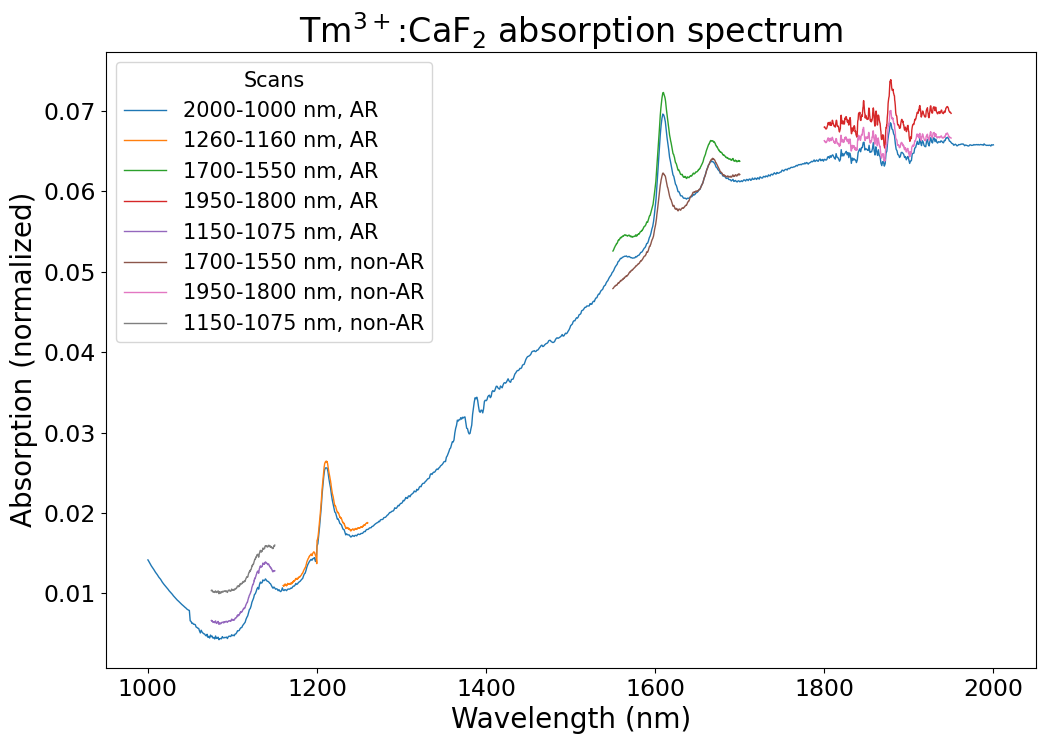

In [3]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

#plot AR cases
for i in range(len(ARwavelengths)):
    plt.plot(ARwavelengths[i], ARabsorptions[i], linewidth=1.0)

plt.xlabel("Wavelength (nm)", fontsize=20)
plt.ylabel("Absorption (normalized)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.title("Tm$^{3+}$:CaF$_2$ absorption spectrum", fontsize=24)
cleaned_names = [name.replace('AR-', '').replace('-Wavelengths', ' nm, AR') for name in data_names if name.startswith('AR') and name.endswith('Wavelengths')]
#plt.legend(cleaned_names, title="Scans (nm)", title_fontsize=15, fontsize=15)

#now plot non-AR cases
for i in range(len(nonARwavelengths)):
    plt.plot(nonARwavelengths[i], nonARabsorptions[i], linewidth=1.0)

cleaned_names.extend([name.replace('non-AR-', '').replace('-Wavelengths', ' nm, non-AR') for name in data_names if name.startswith('non-AR') and name.endswith('Wavelengths')])
plt.legend(cleaned_names, title="Scans", title_fontsize=15, fontsize=15)
plt.show()

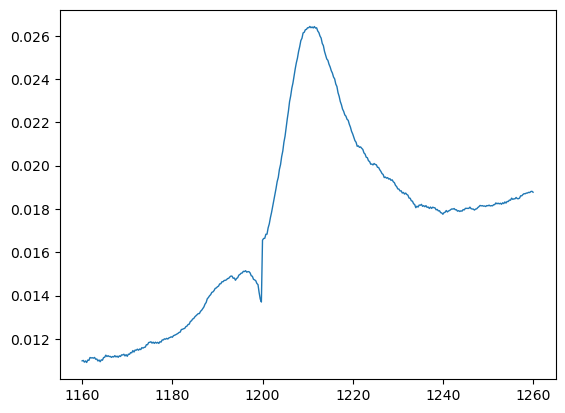

In [5]:
plt.plot(ARwavelengths[1], ARabsorptions[1], linewidth=1.0)
plt.show()

In [8]:
print(ARwavelengths[1][np.nanargmax(ARabsorptions[1])])

1210.5
